In [1]:
import nlsy
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import combinations
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

NLSY_db = nlsy.NLSY_database("data.db")
(cohort_79, cohort_97) = NLSY_db.cohorts

# The Cohort.data() method returns a pandas dataframe, e.g.:
c79=cohort_79.data()
c79['cohort']=79
c79.head()

,case_id,sample_id,sex,race,year,adjusted_income,age,curr_pregnant,work_kind_limited,work_amount_limited,...,urban_or_rural,region,highest_grade,marital_status,number_of_kids,shock,unemployment,gdp_growth,inflation,cohort
0,1,5,2,3,1979,17370,20,NaN,0,0,...,1,1,12,0,NaN,0,0.06,0.03,0.13,79
1,1,5,2,3,1980,-5,-5,NaN,-5,-5,...,-5,-5,-5,-5,-5.0,-1,0.07,0.00,0.13,79
2,1,5,2,3,1981,14722,22,NaN,0,0,...,1,1,12,0,NaN,-1,0.09,0.03,0.09,79
3,1,5,2,3,1982,-5,-5,-5.0,-5,-5,...,-5,-5,-5,-5,-5.0,-1,0.11,-0.02,0.04,79
4,1,5,2,3,1983,-5,-5,-5.0,-5,-5,...,-5,-5,-5,-5,-5.0,-1,0.08,0.05,0.04,79


In [2]:
c97=cohort_97.data()
c97["cohort"]=97
c97.head()

,case_id,sample_id,sex,race,year,adjusted_income,age,curr_pregnant,work_kind_limited,work_amount_limited,...,urban_or_rural,region,highest_grade,marital_status,number_of_kids,shock,unemployment,gdp_growth,inflation,cohort
0,1,1,2,3,1997,-4,15,-4,NaN,NaN,...,1,1,NaN,-4,-4,-1,0.05,0.04,0.02,97
1,1,1,2,3,1998,741,17,-4,NaN,NaN,...,1,1,12.0,0,-4,0,0.04,0.05,0.02,97
2,1,1,2,3,1999,-4,18,-4,NaN,NaN,...,1,1,12.0,0,-4,-1,0.04,0.05,0.03,97
3,1,1,2,3,2000,11874,19,-4,NaN,NaN,...,1,1,13.0,0,-4,0,0.04,0.04,0.03,97
4,1,1,2,3,2001,10087,20,-4,NaN,NaN,...,1,1,14.0,0,-4,0,0.06,0.01,0.02,97


In [3]:
#concatenation of the two datasets.
frames = [c79,c97]
df = pd.concat(frames, keys=['79', '97'])

In [4]:
df.columns

Index(['case_id', 'sample_id', 'sex', 'race', 'year', 'adjusted_income', 'age',
       'curr_pregnant', 'work_kind_limited', 'work_amount_limited',
       'family_size', 'hours_worked_last_year', 'weeks_worked_last_year',
       'urban_or_rural', 'region', 'highest_grade', 'marital_status',
       'number_of_kids', 'shock', 'unemployment', 'gdp_growth', 'inflation',
       'cohort'],
      dtype='object')

In [5]:
#drop all the negative values
df_selected=df[df[df.columns]>=0]
df_selected

case_id  sample_id  sex  race  year  adjusted_income   age  \
79 0             1          5    2     3  1979          17370.0  20.0   
   1             1          5    2     3  1980              NaN   NaN   
   2             1          5    2     3  1981          14722.0  22.0   
   3             1          5    2     3  1982              NaN   NaN   
   4             1          5    2     3  1983              NaN   NaN   
   5             1          5    2     3  1984              NaN   NaN   
   6             1          5    2     3  1985              NaN   NaN   
   7             1          5    2     3  1986              NaN   NaN   
   8             1          5    2     3  1987              NaN   NaN   
   9             1          5    2     3  1988              NaN   NaN   
   10            1          5    2     3  1989              NaN   NaN   
   11            1          5    2     3  1990              NaN   NaN   
   12            1          5    2     3  1991              NaN   NaN   
   13            1          5    2     3  1992              NaN   NaN   
   14            1          5    2     3  1993              NaN   NaN   
   15            1          5    2     3  1994              NaN   NaN   
   16            1          5    2     3  1996              NaN   NaN   
   17            1          5    2     3  1998              NaN   NaN   
   18            1          5    2     3  2000              NaN   NaN   
   19            1          5    2     3  2002              NaN   NaN   
   20            1          5    2     3  2004              NaN   NaN   
   21            1          5    2     3  2006              NaN   NaN   
   22            1          5    2     3  2008              NaN   NaN   
   23            1          5    2     3  2010              NaN   NaN   
   24            1          5    2     3  2012              NaN   NaN   
   25            1          5    2     3  2014              NaN   NaN   
   26            1          5    2     3  2016              NaN   NaN   
   27            2          5    2     3  1979          15039.0  20.0   
   28            2          5    2     3  1980          16636.0  21.0   
   29            2          5    2     3  1981          17667.0  22.0   
...            ...        ...  ...   ...   ...              ...   ...   
97 152698     9021          1    1     3  2001          26658.0  21.0   
   152699     9021          1    1     3  2002          23310.0  22.0   
   152700     9021          1    1     3  2003          19391.0  23.0   
   152701     9021          1    1     3  2004          25121.0  24.0   
   152702     9021          1    1     3  2005          27685.0  25.0   
   152703     9021          1    1     3  2006          30718.0  26.0   
   152704     9021          1    1     3  2007          33552.0  27.0   
   152705     9021          1    1     3  2008          31066.0  28.0   
   152706     9021          1    1     3  2009          35846.0  29.0   
   152707     9021          1    1     3  2010          40602.0  30.0   
   152708     9021          1    1     3  2011          39806.0  31.0   
   152709     9021          1    1     3  2013          19486.0  33.0   
   152710     9021          1    1     3  2015              NaN  35.0   
   152711     9022          1    2     3  1997              NaN  15.0   
   152712     9022          1    2     3  1998           3119.0  17.0   
   152713     9022          1    2     3  1999           1529.0  17.0   
   152714     9022          1    2     3  2000           1781.0  18.0   
   152715     9022          1    2     3  2001          11528.0  19.0   
   152716     9022          1    2     3  2002           7064.0  20.0   
   152717     9022          1    2     3  2003          11080.0  21.0   
   152718     9022          1    2     3  2004          19010.0  22.0   
   152719     9022          1    2     3  2005          32958.0  23.0   
   152720     9022          1    2     3  2006          30718.0  25.0

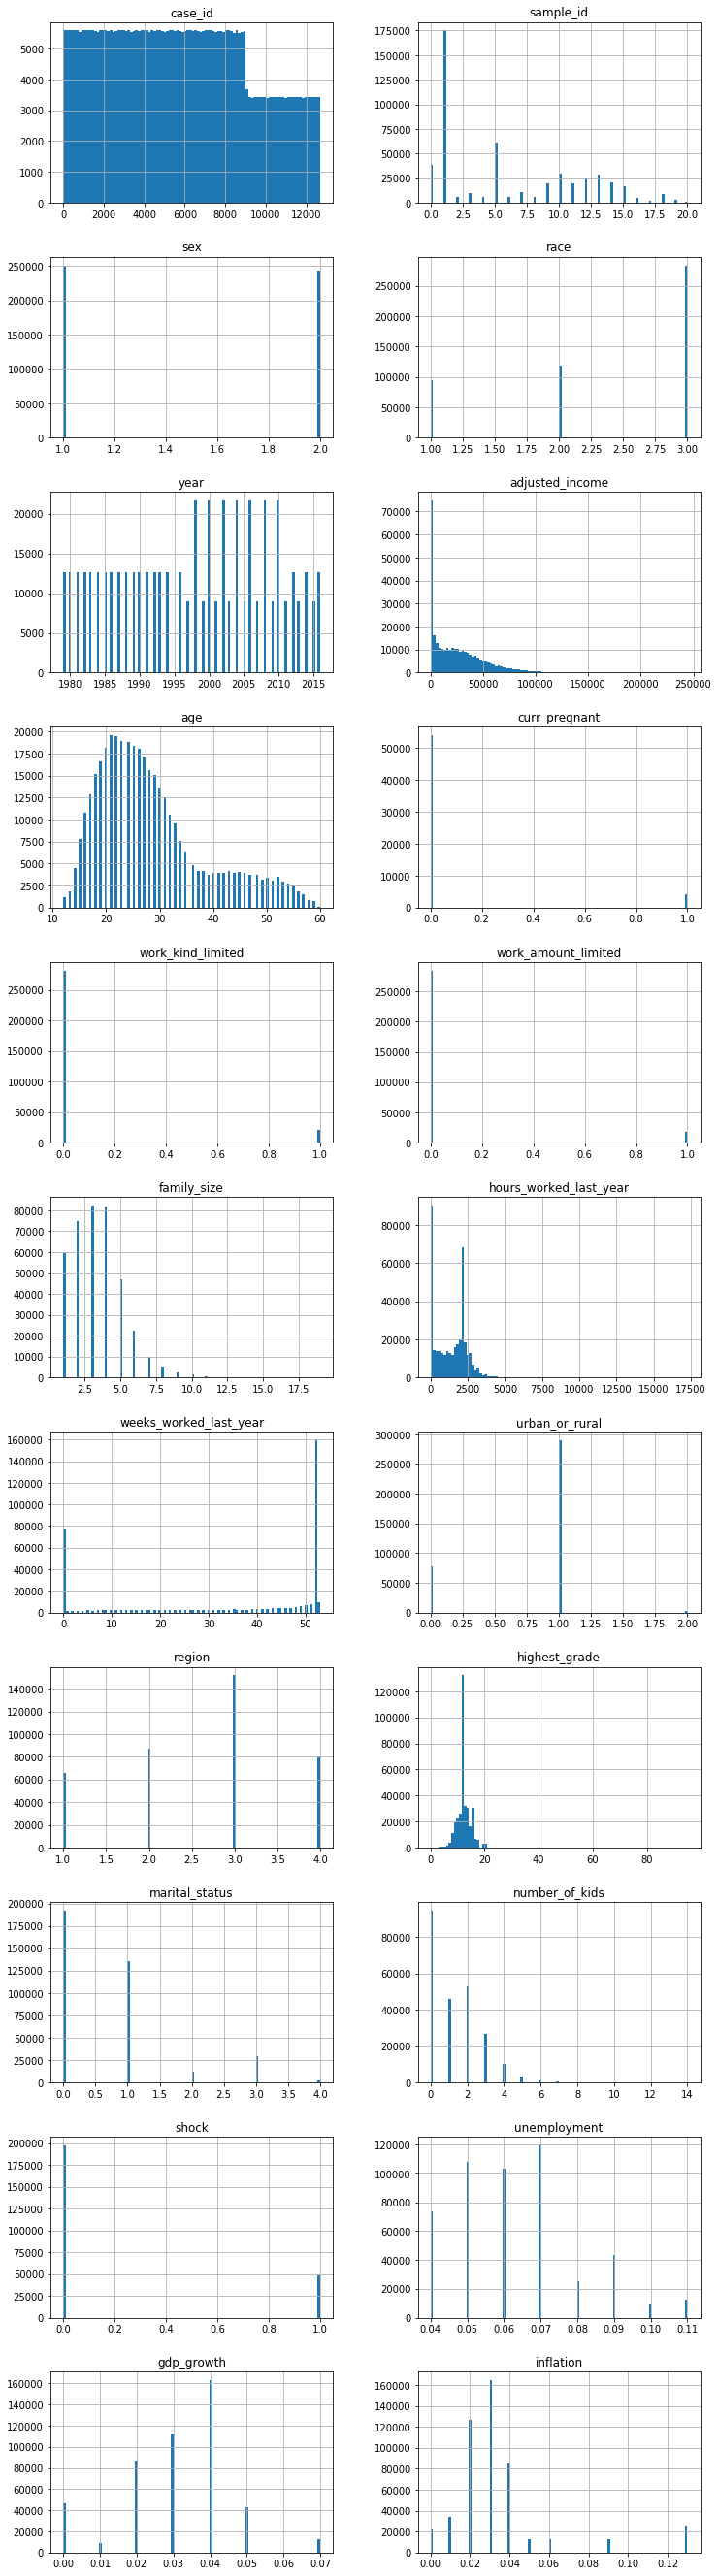

In [6]:
#histgram for all variable just to have a really quick look at their distribution.
#note some of them are not numeric, the histgrams can be seen as bar charts
fig, axes = plt.subplots(len(df_selected.columns)//2, 2, figsize=(12, 48))
i = 0
for triaxis in axes:
    for axis in triaxis:
        df_selected.hist(column = df_selected.columns[i], bins = 100, ax=axis)
        i = i+1

C:\Users\pqy94\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pqy94\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


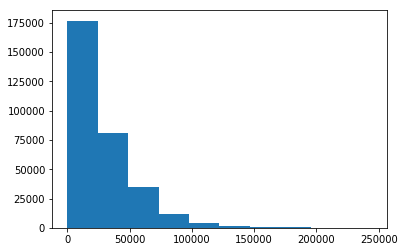

In [7]:
#now let's take a look at each variable - revise the axises for each graph 
plt.hist(df_selected['adjusted_income'])
plt.show()

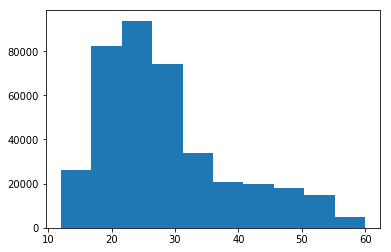

In [8]:
plt.hist(df_selected['age'])
plt.show()

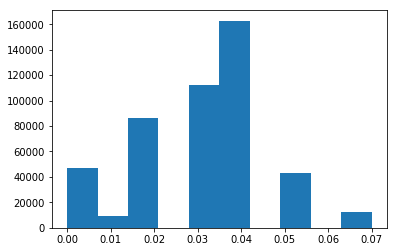

In [9]:
plt.hist(df_selected['gdp_growth'])
plt.show()

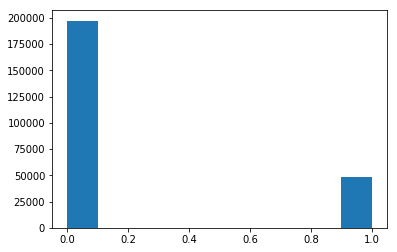

In [10]:
#
plt.hist(df_selected['shock'])
plt.show()

In [ ]:
#pairplot for numeric variables
set_1 = sns.pairplot(df_selected, height=30, diag_kind="hist",
                 vars=['adjusted_income','age','family_size', 'hours_worked_last_year', 'weeks_worked_last_year'],hue="cohort",kind="reg")

C:\Users\pqy94\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pqy94\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\pqy94\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [ ]:
set_2 = sns.pairplot(df_selected, height=30, diag_kind="hist",
                 vars=['number_of_kids','unemployment', 'gdp_growth', 'inflation'],hue="cohort",kind="reg")